In [1]:
import numpy as np
import underworld as uw
import math
from underworld import function as fn
import glucifer


In [2]:
res = 20
elementType="Q1/dQ0"

# lets do some 3d tests
minCoord = [-1.,-1.,-1.]
maxCoord = [ 1., 1., 1.]
mesh = uw.mesh.FeMesh_Cartesian(elementType='Q1', elementRes=(res,res,res), minCoord=minCoord, maxCoord=maxCoord)
 

In [3]:
#marker Surfaces need these
velocityField   = uw.mesh.MeshVariable( mesh=mesh,         nodeDofCount=2 )



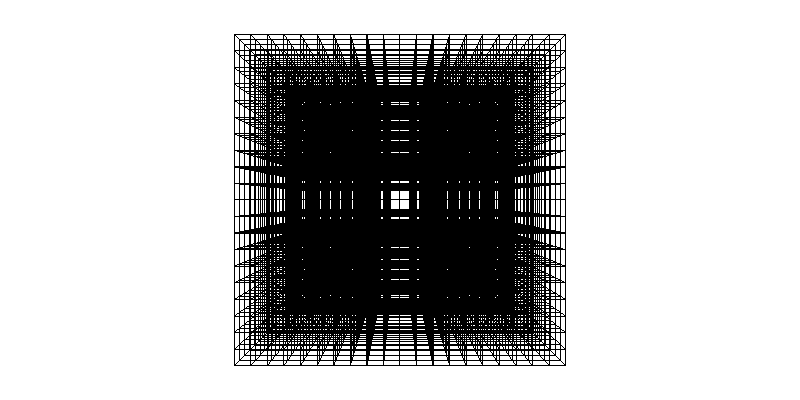

In [4]:
meshfig = glucifer.Figure(figsize=(800,400))
meshfig.append( glucifer.objects.Mesh(mesh) )
#meshfig.show()

## Swarm

In [5]:
swarm = uw.swarm.Swarm(mesh=mesh, particleEscape=True)
layout = uw.swarm.layouts.PerCellRandomLayout(swarm=swarm, particlesPerCell=5)
swarm.populate_using_layout( layout=layout ) # Now use it to populate.

signedDistanceVariable = swarm.add_variable( dataType="double", count=1 )

signedDistanceVariable.data[:] = 0.0


## Create marker3D

In [ ]:
from unsupported_dan.interfaces.marker3D import markerSurface3D

In [7]:
coords = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))

In [8]:
mask = np.abs(np.linalg.norm(np.column_stack((coords[0].flatten(), coords[1].flatten())), axis=1)) < 0.75

xs = coords[0].flatten()[mask]
ys = coords[1].flatten()[mask]

In [3]:
zs = 0.25 + 0.5*(xs + ys)

NameError: name 'xs' is not defined

In [16]:
print(xs.shape)

/workspace/newSlab/unsupported_dan/interfaces/__init__.py:9: UserWarning: 

The interface module is not supported.
Questions should be addressed to louis.moresi@unimelb.edu.au 
 
  Questions should be addressed to louis.moresi@unimelb.edu.au \n """


In [18]:
surface = markerSurface3D(mesh, velocityField, xs, ys,zs, 0.2, 1.)

In [21]:
sd, pts = surface.compute_signed_distance(swarm.particleCoordinates.data, distance=0.1)


In [26]:
signedDistanceVariable.data[sd <=surface.thickness] = sd[sd <=surface.thickness]



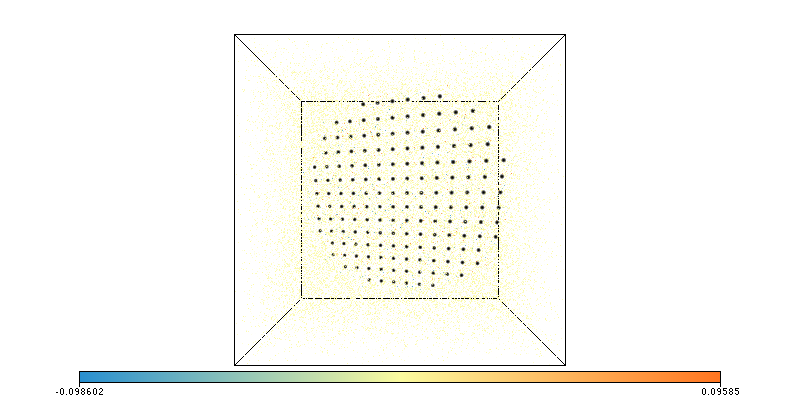

In [28]:
swarmfig = glucifer.Figure(figsize=(800,400))
#swarmfig.append( glucifer.objects.Points(testswarm, pointSize=5, colourBar=False) )

swarmfig.append( glucifer.objects.Points(swarm, signedDistanceVariable) )
#swarmfig.show()

In [29]:
swarmfig.save_database('test.gldb')

'test.gldb'

In [30]:
#test proximity var.

#sp, pts0 = surface.compute_marker_proximity(swarm.particleCoordinates.data)

In [32]:
#np.unique(sp)

array([ 0.,  1.])